In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from data_setup import integer_mapping, integer_training_setup, oneHotEncoder_setup

## Data Overview

In [2]:
df = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
df = integer_mapping(df)
df

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,2,2,1,1,unacc
1,4,4,2,2,1,2,unacc
2,4,4,2,2,1,3,unacc
3,4,4,2,2,2,1,unacc
4,4,4,2,2,2,2,unacc
...,...,...,...,...,...,...,...
1723,1,1,5,5,2,2,good
1724,1,1,5,5,2,3,vgood
1725,1,1,5,5,3,1,unacc
1726,1,1,5,5,3,2,good


In [4]:
df.dtypes

buying       int64
maint        int64
doors        int64
persons      int64
lug_boot     int64
safety       int64
class       object
dtype: object

In [5]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,2.500000,2.500000,3.500000,3.666667,2.000000,2.000000
std,1.118358,1.118358,1.118358,1.247580,0.816733,0.816733
min,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,1.750000,1.750000,2.750000,2.000000,1.000000,1.000000
50%,2.500000,2.500000,3.500000,4.000000,2.000000,2.000000
75%,3.250000,3.250000,4.250000,5.000000,3.000000,3.000000
max,4.000000,4.000000,5.000000,5.000000,3.000000,3.000000


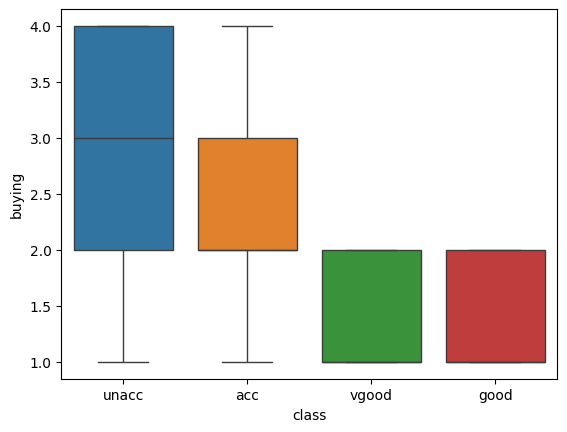

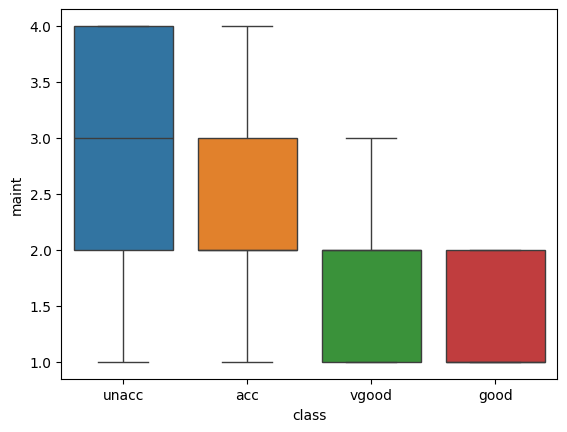

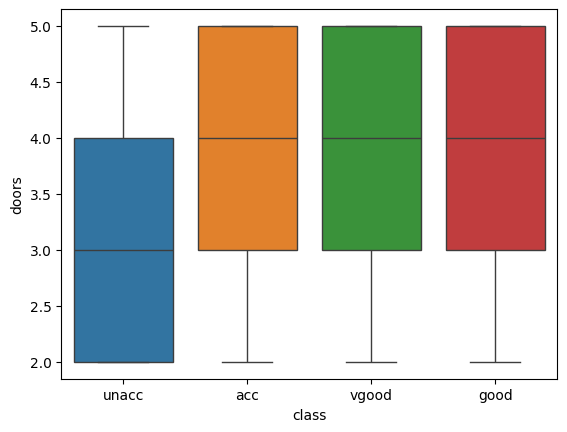

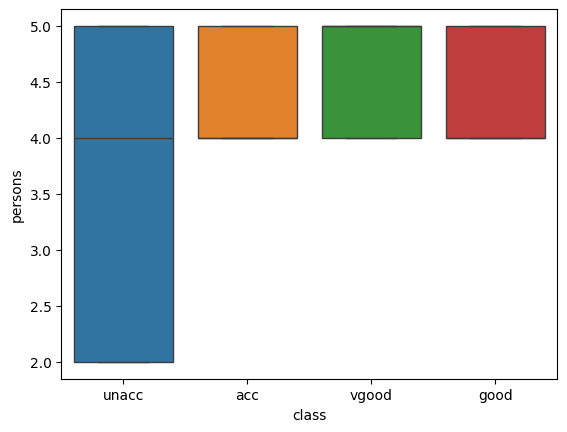

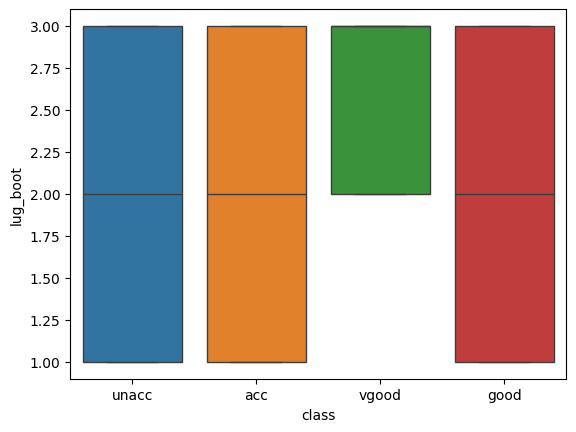

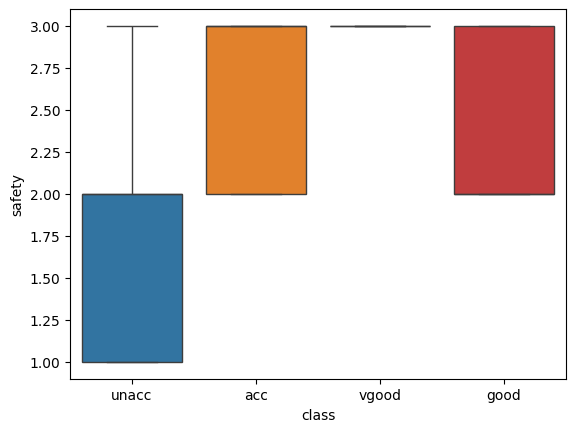

In [8]:
for i in df.columns[:-1]:
    sns.boxplot(x='class',y=i,data=df,hue='class')
    plt.show()

In [10]:
for i in df.columns[:-1]:
    fig = px.box(df,x='class',y=i,color='class')
    fig.show()

## Integer Mapping Decision Tree Classifier

In [22]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=302)

# Fit the model on the training data
X_train, X_test, y_train, y_test = integer_training_setup(df)

model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9653179190751445
Classification Report:
               precision    recall  f1-score   support

         acc       0.97      0.90      0.94        83
        good       0.56      0.91      0.69        11
       unacc       0.99      1.00      1.00       235
       vgood       1.00      0.82      0.90        17

    accuracy                           0.97       346
   macro avg       0.88      0.91      0.88       346
weighted avg       0.97      0.97      0.97       346



## OneHot Encoder Decision Tree Classifier

In [23]:
df_oneHot = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

In [25]:
X_train, X_test, y_train, y_test = oneHotEncoder_setup(df_oneHot)

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=302)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9566473988439307
Classification Report:
               precision    recall  f1-score   support

         acc       0.99      0.87      0.92        83
        good       0.62      0.91      0.74        11
       unacc       0.98      1.00      0.99       235
       vgood       0.82      0.82      0.82        17

    accuracy                           0.96       346
   macro avg       0.85      0.90      0.87       346
weighted avg       0.96      0.96      0.96       346



## Integer Mapping Random Forest Classifier

In [26]:
X_train, X_test, y_train, y_test = integer_training_setup(df)

rfc_model = RandomForestClassifier(n_estimators=100, random_state=302)
rfc_model.fit(X_train, y_train)
rfc_y_pred = rfc_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, rfc_y_pred)
report = classification_report(y_test, rfc_y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9739884393063584
Classification Report:
               precision    recall  f1-score   support

         acc       0.97      0.93      0.95        83
        good       0.65      1.00      0.79        11
       unacc       1.00      1.00      1.00       235
       vgood       0.93      0.82      0.88        17

    accuracy                           0.97       346
   macro avg       0.89      0.94      0.90       346
weighted avg       0.98      0.97      0.98       346



## OneHot Encoder Random Forest Classifier

In [27]:
X_train, X_test, y_train, y_test = oneHotEncoder_setup(df_oneHot)

rf_model = RandomForestClassifier(n_estimators=100, random_state=302)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, rf_y_pred)
report = classification_report(y_test, rf_y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9624277456647399
Classification Report:
               precision    recall  f1-score   support

         acc       0.95      0.92      0.93        83
        good       0.56      0.82      0.67        11
       unacc       1.00      1.00      1.00       235
       vgood       0.87      0.76      0.81        17

    accuracy                           0.96       346
   macro avg       0.84      0.87      0.85       346
weighted avg       0.97      0.96      0.96       346



## K-Fold Cross Validation - Decision Tree - Integer Mapping

In [28]:
df_KF_DT = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

In [29]:
df_KF_DT = integer_mapping(df_KF_DT)

X = df_KF_DT.drop('class',axis=1)
y = df_KF_DT['class']

kf = KFold(n_splits=5, shuffle=True, random_state=302)

# Initialize the model
model = DecisionTreeClassifier(random_state=302)

# Perform k-fold cross-validation and store results
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Calculate the mean and standard deviation of the scores
print(f"CV Accuracy scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores)}")

CV Accuracy scores: [0.98265896 0.98265896 0.98265896 0.96521739 0.9826087 ]
Mean CV Accuracy: 0.9791605931138477
Standard Deviation of CV Accuracy: 0.006971628084159133


## K-Fold Cross Validation - RandomForestClassifier - Integer Mapping

In [32]:
df_KF_RFC = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

In [33]:
df_KF_RFC = integer_mapping(df_KF_RFC)

X = df_KF_RFC.drop('class',axis=1)
y = df_KF_RFC['class']

# Load your data: features and target
# Assuming X and y are your dataset features and target variable

# Setup the KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=302)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=302)

# Perform k-fold cross-validation and store results
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Calculate the mean and standard deviation of the scores
print(f"CV Accuracy scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores)}")


CV Accuracy scores: [0.97398844 0.98265896 0.97109827 0.97681159 0.98550725]
Mean CV Accuracy: 0.9780129010639189
Standard Deviation of CV Accuracy: 0.005351685363097233


## K-Fold Cross Validation - Decision Tree - OneHot Encoder

In [34]:
encoder = OneHotEncoder()
X = encoder.fit_transform(df_KF_DT.drop('class', axis=1))
y = df_KF_DT['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=302)

# Load your data: features and target
# Assuming X and y are your dataset features and target variable

# Setup the KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=302)

# Initialize the model
model = DecisionTreeClassifier(random_state=42)

# Perform k-fold cross-validation and store results
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Calculate the mean and standard deviation of the scores
print(f"CV Accuracy scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores)}")

CV Accuracy scores: [0.98554913 0.97109827 0.97687861 0.95652174 0.95942029]
Mean CV Accuracy: 0.96989360810924
Standard Deviation of CV Accuracy: 0.010805870839186693


## K-Fold Cross Validation - Random Forest Classifier - OneHot Encoder

In [35]:
encoder = OneHotEncoder()
X = encoder.fit_transform(df_KF_RFC.drop('class', axis=1))
y = df_KF_RFC['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=302)

# Load your data: features and target
# Assuming X and y are your dataset features and target variable

# Setup the KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform k-fold cross-validation and store results
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Calculate the mean and standard deviation of the scores
print(f"CV Accuracy scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores)}")

CV Accuracy scores: [0.97109827 0.95086705 0.95953757 0.97101449 0.92753623]
Mean CV Accuracy: 0.9560107229622183
Standard Deviation of CV Accuracy: 0.016139638896518288
